## Applied - Question 10

We will work with Boston data set (Boston.csv). The data was originally published by Harrison, 
D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', 
J. Environ. Economics & Management, vol.5, 81-102, 1978.

There are 14 attributes in each case of the dataset. They are:

  1. CRIM - per capita crime rate by town  
  2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
  3. INDUS - proportion of non-retail business acres per town.
  4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  5. NOX - nitric oxides concentration (parts per 10 million)
  6. RM - average number of rooms per dwelling
  7. AGE - proportion of owner-occupied units built prior to 1940
  8. DIS - weighted distances to five Boston employment centres
  9. RAD - index of accessibility to radial highways
  10. TAX - full-value property-tax rate per $10,000
  11. PTRATIO - pupil-teacher ratio by town
  12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  13. LSTAT - % lower status of the population
  14. MEDV - Median value of owner-occupied homes in $1000's
#### Import blocks.

In [78]:
import pandas as pd
import os
import dfply
from dfply import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [79]:
# First look at the data
path = os.path.join(os.getcwd(), 'Boston.csv')
boston = pd.read_csv(path)
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are 506 observations in this dataset with 14 variables.  
While I would always go for seaborn pairs plot at the start, that would be too small of an image. 
Lets try to do the correlation plot and go from there.

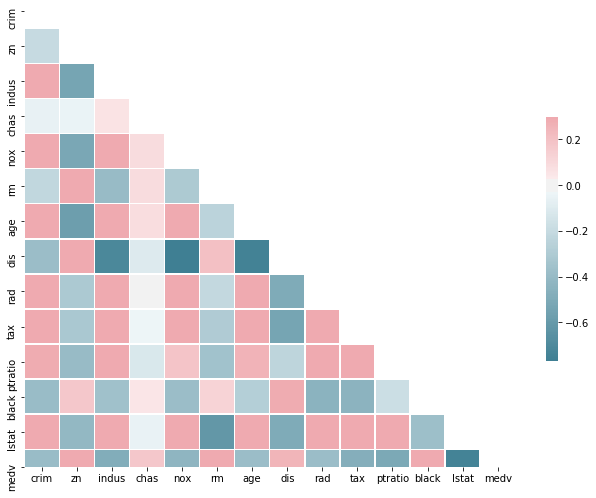

In [80]:
# sns.pairplot(boston)
# Compute the correlation matrix
corr = boston.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

That is much easier to work with! We can see some strong correlation here
  * ZN with age, nox, and indus
  * INDUS with dis and rm
  * NOX with dis
  * RM with lstat
  * AGE with dis
  * DIS with lstat, tax, rad
  * LSTAT with medv

It would take hours to go through each of the plots so I will move on from here. A quick scatterplot
of any of the above can give a better understanding of each relationship.

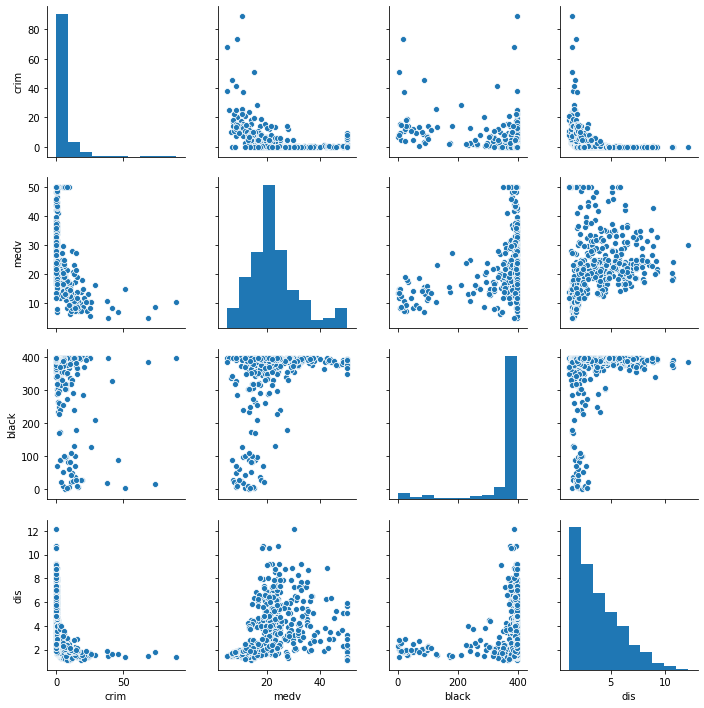

In [81]:
a = ggplot(data=boston) + geom_point(aes(y='crim', x='medv'))
temp = boston >> select(X.crim, X.medv, X.black, X.dis)
sns.pairplot(temp)
plt.show()

Lets focus on the crime rate variable: CRIM - per capita crime rate by town.  
CRIM correlated with the following variables:
  * medv - median income. Lower income would leads to higher crime rate naturally.
  * black - black people proportions. A higher black population results in higher crime rate.
  * dis - distance from employments. More crime in the urban areas / working centers.

Where are the most dangerous areas in boston?

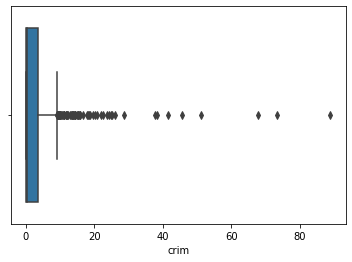

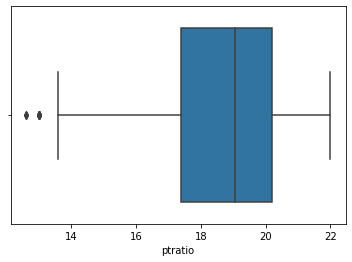

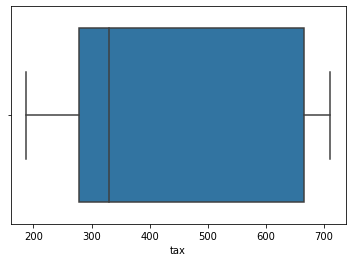

In [82]:
sns.boxplot(data=boston, x='crim')
plt.show()
sns.boxplot(data=boston, x='ptratio')
plt.show()
sns.boxplot(data=boston, x='tax')
plt.show()

Most cities have low crime rate (<1). However, we have a very long tail which is reaching over 80%.  


In [83]:
boston_suburb_crim20 = boston >> filter_by(X.crim >= 20.00)
boston_suburb_tax666 = boston >> filter_by(X.tax >= 666)
boston_suburb_ptratio20 = boston >> filter_by(X.ptratio >= 20.00)
boston_suburb_charles = boston >> filter_by(X.chas == 1)
i = len(boston_suburb_crim20)
j = len(boston_suburb_tax666)
k = len(boston_suburb_ptratio20)
f = len(boston_suburb_charles)
g = np.median(boston['ptratio'])
 
print('Crime: ' + str(i) + ' Tax: ' + str(j) + ' Ptratio: ' 
      + str(k) + ' River: ' + str(f) + ' Median PTR: ' + str(g))

Crime: 18 Tax: 137 Ptratio: 201 River: 35 Median PTR: 19.05


There are 14 suburbs with crime rate above 20%, 137 suburbs with tax rate over 666 and 201 suburbs
with over 20 pupil-to-teacher ratio.  
35 of the suburbs are bounded by the Charles river.

The median pupil to teacher ratio of Boston is 19.50

In [84]:
min_medv = np.min(boston['medv']) 
boston_lowest_medv = boston >> filter_by(X.medv==min_medv)
boston_lowest_medv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


The lowest median value of owners occupied homes is $5,000. The two suburbs with this value have
a very high crime rate as well as old houses. Moreover, they are dominated by black populations.

In [85]:
seven_to_eight = boston[(boston['rm'] > 7) & (boston['rm'] < 8)]
print('7 to 8 rooms per dwelling: ' + str(len(seven_to_eight)))

boston[boston['rm'] > 8]

7 to 8 rooms per dwelling: 51


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


There are 51 suburbs with over 7 rooms per dwelling with 13 of them have more than 8 rooms per dwelling.  
The 13 suburbs with >8 rooms per dwelling have a low a decently low crime rate, mostly not bounded 
by Charles river and with high median income. They also have low lstat.